In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy as sp

In [34]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

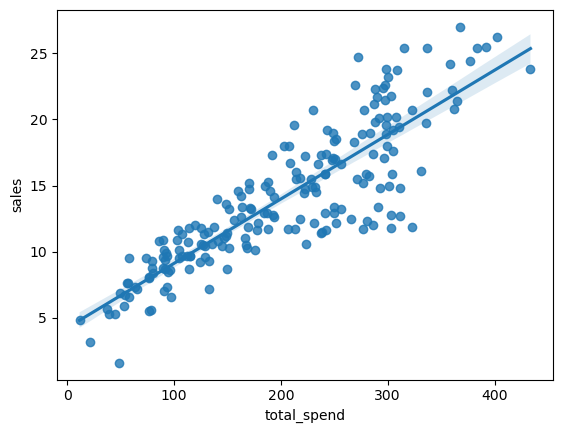

In [36]:
sns.regplot(data=df,x='total_spend',y='sales')

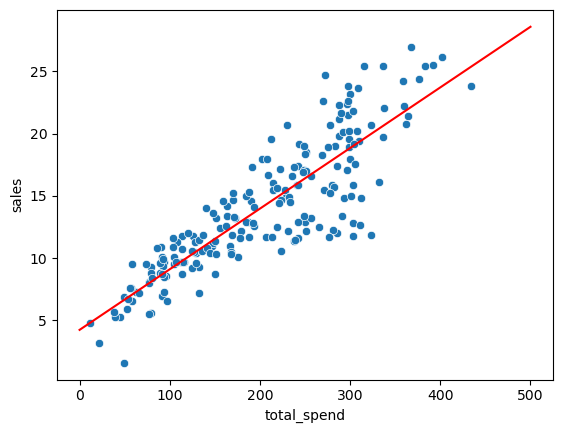

In [37]:
X = df['total_spend']
y = df['sales']

poly = np.polyfit(x=X,y=y,deg=1)
# y = mx+b
# y = B1x + B0
# polyfit returns the B coeff for X and Y
potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*potential_spend + poly[1]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')


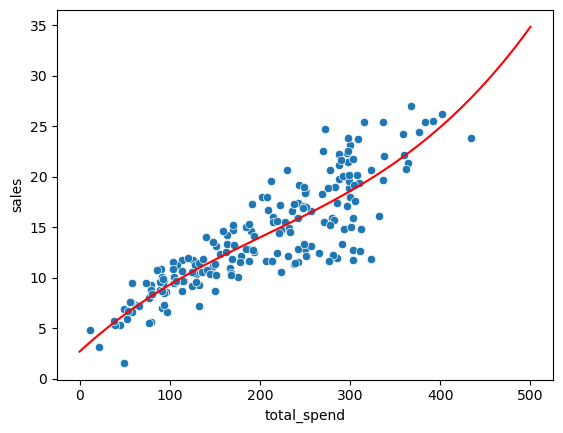

In [38]:
poly = np.polyfit(x=X,y=y,deg=3)

potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*(potential_spend**3) + poly[1]*(potential_spend**2) + poly[2]*potential_spend + poly[3]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')

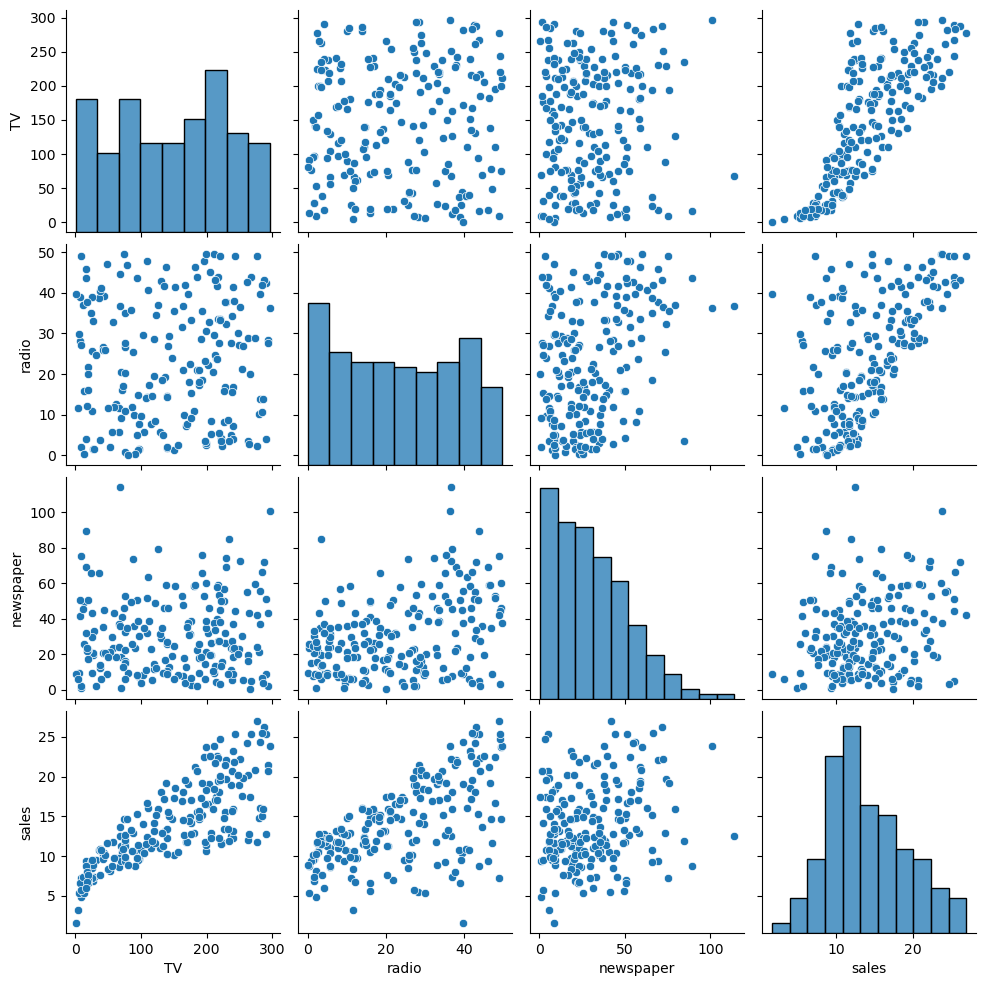

In [39]:
df = pd.read_csv('Advertising.csv')

sns.pairplot(df)

In [40]:
# Separate values into X and Y

X = df.drop('sales', axis=1)
y = df['sales']

In [41]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.3, random_state=101)

In [42]:
model = LR()

In [43]:
model.fit(X_train,y_train)

LinearRegression()

In [44]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [49]:
test_pred = model.predict(X_test)

#Mean Absolute Error
# Data as a whole is doing ok

a = mean_absolute_error(y_test,test_pred)

#RMSE
#Root Mean Square Error
# There are some data points that are far away from goal

b = np.sqrt(mean_squared_error(y_test,test_pred))

print(a)
print(b)

1.2137457736144805
1.5161519375993882


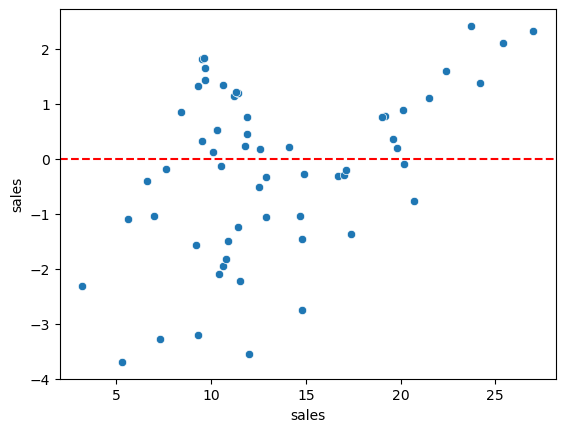

In [54]:
#
# Residual Points
#

#Residual errors should be  random and close to the normal curve

# If the residual plot shows a clear curve or pattern, it means 
#that linear regression is not valid for this data set

test_res = y_test - test_pred

sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0,color='red',ls='--')

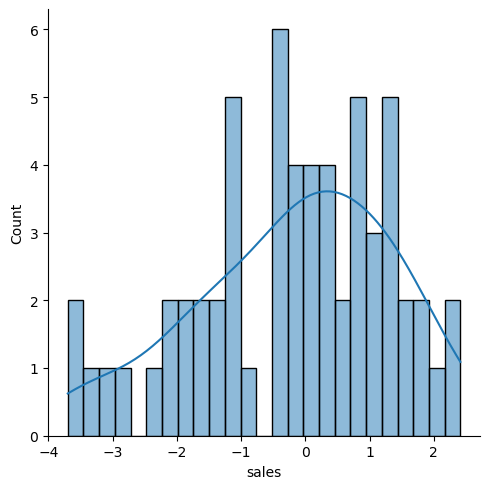

In [55]:
# Checking Normal Distribution

sns.displot(test_res,bins=25,kde=True)

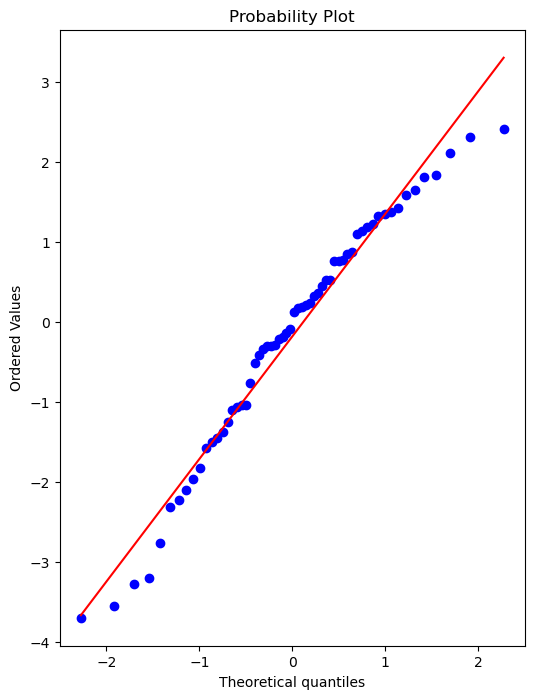

In [57]:
# Checking the probability plot

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(test_res,plot=ax)

In [ ]:
#
# Model Deployment
#
